### Importing Libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np
import joblib

### Loading and Pre-Processing

In [6]:
# Load your CSV data with landmarks and gesture labels
data = pd.read_csv("hand_gesture_data.csv", index_col=False)

# Separate features (landmark coordinates) and labels (gesture labels)
X = data.drop(columns=['label'])  # Features (landmarks x, y, z)
y = data['label']  # Labels (gesture)

X.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.0,0.0,0.0,-0.051507,-0.014685,-0.005274,-0.099666,-0.056508,-0.011437,-0.135981,...,-0.035315,-0.013343,-0.289512,-0.047603,-0.013333,-0.348442,-0.048902,-0.015137,-0.404078,-0.047788
1,0.0,0.0,0.0,-0.051288,-0.018117,-0.006239,-0.097682,-0.058770,-0.013647,-0.133172,...,-0.036984,-0.005763,-0.288941,-0.049872,-0.003863,-0.348253,-0.050804,-0.003369,-0.404901,-0.049180
2,0.0,0.0,0.0,-0.049602,-0.016790,-0.005081,-0.097026,-0.060447,-0.010841,-0.132746,...,-0.035551,-0.005846,-0.292315,-0.048447,-0.003593,-0.351420,-0.049840,-0.003302,-0.408010,-0.048638
3,0.0,0.0,0.0,-0.050999,-0.019599,-0.006350,-0.097345,-0.061749,-0.013809,-0.132698,...,-0.036468,-0.006652,-0.292402,-0.049939,-0.004653,-0.352190,-0.051289,-0.003949,-0.408815,-0.049752
4,0.0,0.0,0.0,-0.054792,-0.015661,-0.002931,-0.101906,-0.058319,-0.007906,-0.137414,...,-0.035768,-0.010248,-0.291840,-0.048314,-0.008680,-0.351023,-0.049753,-0.008603,-0.406822,-0.048734


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Add Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

### Grid Search

In [9]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(probability=True, random_state=9), param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

model = grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


### Model Evaluation

In [10]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9990808823529411

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       184
           1       1.00      1.00      1.00       129
           2       1.00      0.99      1.00       190
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00       117
           5       1.00      1.00      1.00       117
           6       1.00      1.00      1.00       109
           7       1.00      1.00      1.00       133

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088



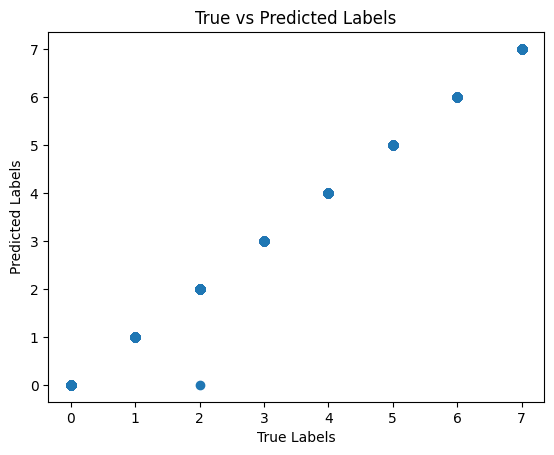

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("True vs Predicted Labels")
plt.show()

<Axes: >

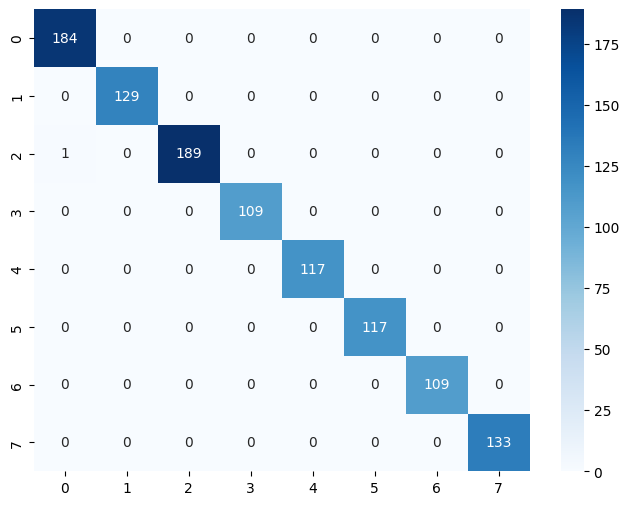

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))

### Saving the Model and Scaler

In [13]:
joblib.dump(model, 'gesture_model.pkl')
print("Model saved as 'gesture_model.pkl'")

joblib.dump(scaler, 'gesture_scaler.pkl')
print("Scaler saved as 'gesture_scaler.pkl'")

Model saved as 'gesture_model.pkl'
Scaler saved as 'gesture_scaler.pkl'
